# TP5- PDS - Espectrograma
Lucas Pereira Fernandes - 08/05/2021

In [1]:
# here goes your include modules...
import numpy as np
import matplotlib.pyplot as plt

# in this TP we will use scipy module to read the files
from scipy.io import wavfile
# if you rather to use librosa, use the lines below
import librosa

# below are the module used to play the audio vectors in jupyterlab
from IPython.display import Audio
from mpl_toolkits.mplot3d import Axes3D

**TP05 - Espectrograma.**

---

O espectrograma é uma representação visual da variação do espectro de frequência ao longo do tempo. Um formato comum do espectrograma é um gráfico de duas dimensões geométricas, um eixo é o eixo de representaçõa temporal e o outro é o de representação frequêncial.

O espectrograma pode ser gerado de várias maneiras, seja com um banco de filtros (*filterbank*) ou com a utilização da transformada de Fourier (DFT). Nesse exemplo utilzaremos a transformada rápida de Fourier (FFT) para criação do espectrograma.

Este trabalho prático será utilizado no intuito de estudar diferentes tipos de visualização de informação, bem como de aumentar sua proficiência na manipulação de sinais digitais.

In [2]:
# O arquivo de audio utilizado está no github, antes de 
# fazer as células funcionarem faça o download do arquivo 
# caprice24mono.wav e coloque-o em uma pasta no drive 
# para que você possa utilizá-lo com o google colab.

# O arquivo caprice24mono.wav é um extrato do arquivo
# encontrado em https://en.wikipedia.org/wiki/File:Paganini_Caprice-24.ogg
# O intervalo do arquivo é entre os segundos 27 e 32, e
# foi escolhido pois é possível escutar com nitidez os dois
# instrumentos (violino e piano).

data_sr, data = wavfile.read('caprice24mono.wav')
Audio(data, rate=data_sr)

O espectograma de um sinal unidimensional é obtido com o cálculo da FFT de uma janela (intervalo do sinal). Essa janela "*anda*" ao longo do tempo e podem se sobrepor ou não. A movimentação dessa janela ao longo do tempo é definida por um *overlap*, e no caso do overlap ter o mesmo tamanho da janela, então as janelas não se sobrepõem.

As células abaixo contém uma função cada. A primeira calcula a fft de um intervalo do sinal, e a segunda retornam uma *matriz* com o espectograma calculado.

In [3]:
# Calcula a FFT de um intervalo do sinal s.
# O intervalo é definido pelas variáveis a e b
# em uma versão mais completa (sem os comentários)
# a função retorna também os índices de frequência
# da fft

def getFFTFromWindow(s, a, b, fs=data_sr):
    sig = s[a:b]
    fftsig = np.fft.fft(sig)
    fftsig = np.fft.fftshift(fftsig)

    N = len(fftsig)
    # freq = np.fft.fftfreq(N, 1/fs)
    # freq = np.fft.fftshift(freq)

    # return freq[:int(N/2):], fftsig[:int(N/2)]
    return fftsig[:int(N/2)]

In [4]:
# Retorna o espectrograma de um sinal data
# A variável fs é a frequência de amostragem do sinal
# data (não é utilizado no código). Nessa função é 
# importante definir o tamanho da janela (window) e 
# qual é a sobre posição das janelas (overlap) para 
# o cálculo da fft do intervalo do sinal

def spectrogram(data, fs, window=1000, overlap=500):
    total = len(data)
    
    spectrogram = np.empty((1, int(window/2)))
    
    i = 0
    while True:
      spec = getFFTFromWindow(data, i*overlap, i*overlap + window)

      if len(spec) != int(window/2):
        break
      spectrogram = np.vstack((spectrogram, np.abs(spec[:])))
      i+=1

    return np.absolute(spectrogram.T)

Uma das maneiras de visualizar e compreender o espectrograma é **"como o sinal varia em frequência ao longo do tempo"**, para isso a visualização em 3d da matriz do espectrograma é uma boa maneira de proceder.

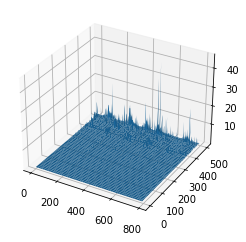

In [21]:
# Cálculo e visualização do espectrograma de 
# um sinal de voz (data), com janelamento de 1000
# amostras e overlap de 100 amostras.


# Cálculo do espectrograma
spectro = spectrogram(data, data_sr, window=1000, overlap=100)

# Visualização da matriz do espectrograma
# Set up grid and test data
ny = np.shape(spectro)[0]
nx = np.shape(spectro)[1]

x = range(nx)
y = range(ny)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ha.plot_surface(X, Y, spectro)

plt.show()

De uma maneira mais simples, a matriz do espectrograma é *explicada* como uma matriz de intensidades (já que em nosso caso a função espectrograma retorna a magnitude do sinal). Daí a visualização em 2d.

Note que os atributos *vmin* e *vmax* são utilizados para melhor vizualização.

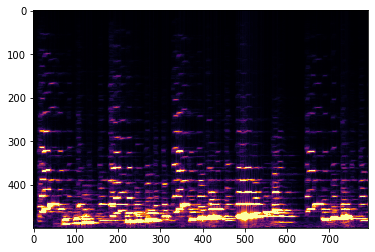

In [22]:
plt.imshow(spectro/np.mean(spectro), aspect='auto', cmap='inferno', vmin=0, vmax=8)

Responda:

**1.** Explique com suas palavras como é extraído o espectrograma de um sinal.

São feitos "prints" de cada momento da fft do sinal e estes são colocados em sequência. A cada intervalo de tempo é capturado o print e assim se segue até o fim do tempo do sinal. Dessa forma é possível observar o comportamento de cada faixa de frequência ao longo do tempo. Se houve atenuação ou houve ganho de magnitude com o passar do tempo.

**2.** Modifique a função spectrogram para que diferentes tipos de janelas possam ser utilizados na variável *data* no interior da função spectrogram.

In [7]:
# Nessa célula definimos algumas janelas que serão utilizadas
# no decorrer desse trabalho. Explicações sobre o efeito de
# cada uma das funções de janelamento bem como suas formulações
# podem ser encontrados em https://en.wikipedia.org/wiki/Window_function

def hannWindow(N):
    n = np.linspace(-N/2, N/2, N)
    return 0.5*(1+np.cos(2*np.pi*n/N))

def hammingWindow(N, a0=0.53836):
    n = np.linspace(0, N, N)
    return a0-(1-a0)*(np.cos(2*np.pi*n/N))

def gaussianWindow(N, sigma=0.5):
    n = np.linspace(0, N, N)
    return np.exp(-0.5*((n-N/2)/(sigma*N/2))**2)

def blackmanHarrisWindow(N):
    a0, a1, a2, a3 = 0.35875, 0.48829, 0.14128, 0.01168
    n = np.linspace(0, N, N)
    return a0-a1*np.cos(2*np.pi*n/N)+a2*np.cos(4*np.pi*n/N)-a3*np.cos(6*np.pi*n/N)

def flattopWindow(N):
    a0, a1, a2, a3, a4 = 0.21557895, 0.41663158, 0.277263158, 0.083578947, 0.006947368
    n = np.linspace(0, N, N)
    return a0-a1*np.cos(2*np.pi*n/N)+a2*np.cos(4*np.pi*n/N)-a3*np.cos(6*np.pi*n/N)+a4*np.cos(8*np.pi*n/N)
def rectangularWindow(N):
    n = np.ones(N)
    return n

In [8]:
def getFFTFromWindow_2(s, a, b, janela, fs=data_sr):
    sig = s[a:b]
    sig = sig*janela(sig.shape[0])
    fftsig = np.fft.fft(sig)
    fftsig = np.fft.fftshift(fftsig)

    N = len(fftsig)
    # freq = np.fft.fftfreq(N, 1/fs)
    # freq = np.fft.fftshift(freq)

    # return freq[:int(N/2):], fftsig[:int(N/2)]
    return fftsig[:int(N/2)]

In [9]:
def spectrogram_2(data, fs,janela, window=1000, overlap=500):
    total = len(data)
    
    spectrogram_2 = np.empty((1, int(window/2)))
    
    i = 0
    while True:
      spec = getFFTFromWindow_2(data, i*overlap, i*overlap + window,janela)

      if len(spec) != int(window/2):
        break
      spectrogram_2 = np.vstack((spectrogram_2, np.abs(spec[:])))
      i+=1

    return np.absolute(spectrogram_2.T)

**3.** Faça um espectrograma com utilizando um janelamento do tipo gaussiano e faça o plot de visualização utilizando
```
plt.imshow(spectro/np.mean(spectro), aspect='auto', cmap='inferno', vmin=0, vmax=8)
```

O que aconteceu? Agora utilize
```
plt.imshow(spectro, aspect='auto', cmap='inferno', vmin=0, vmax=1)
```

Explique.

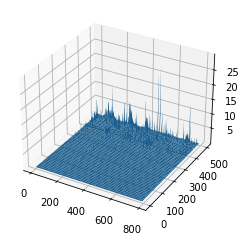

In [23]:
spectro_gaussian = spectrogram_2(data, data_sr,gaussianWindow,window=1000, overlap=100)

# Visualização da matriz do espectrograma
# Set up grid and test data
ny = np.shape(spectro_gaussian)[0]
nx = np.shape(spectro_gaussian)[1]

x = range(nx)
y = range(ny)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ha.plot_surface(X, Y, spectro_gaussian)

plt.show()

Text(0.5, 1.0, 'Janelamento gaussiano 0 - 1')

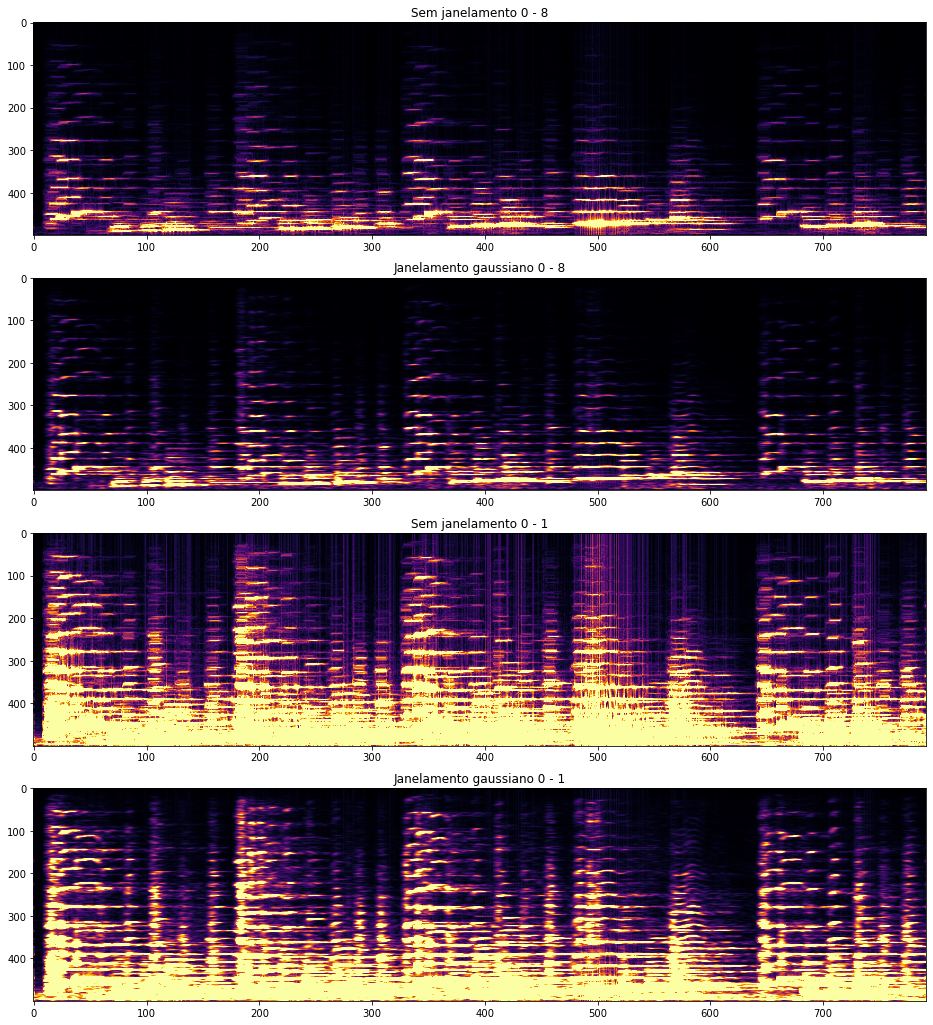

In [24]:
plt.figure(figsize=(16,18))

plt.subplot(4,1,1)
plt.imshow(spectro/np.mean(spectro), aspect='auto', cmap='inferno', vmin=0, vmax=8)
plt.title('Sem janelamento 0 - 8')

plt.subplot(4,1,2)
plt.imshow(spectro_gaussian/np.mean(spectro_gaussian), aspect='auto', cmap='inferno', vmin=0, vmax=8)
plt.title('Janelamento gaussiano 0 - 8')

plt.subplot(4,1,3)
plt.imshow(spectro/np.mean(spectro), aspect='auto', cmap='inferno', vmin=0, vmax=1)
plt.title('Sem janelamento 0 - 1')

plt.subplot(4,1,4)
plt.imshow(spectro_gaussian/np.mean(spectro_gaussian), aspect='auto', cmap='inferno', vmin=0, vmax=1)
plt.title('Janelamento gaussiano 0 - 1')


Nota-se que utilizando o janelamento as faixas de frequências sofrem uma "suavização". No caso do vmin = 0 e vmax = 1 fica claro que existem algumas regiões com intensidades altas que, após a aplicação da janela gaussiana, ficam com intensidade menor além de bordas mais suavizadas. Em termos espectrais isso significa que a janela causa o efeito de "spectral leakage", ou seja, as frequências que deveriam estar presentes em picos são espalhadas ao redor desse valor.

**4.** Crie um vetor com a representação da função [chirp](https://en.wikipedia.org/wiki/Chirp) e visualize o espectrograma. Explique o que acontece.

In [30]:
N = 1000
f0 = 10
f1 = 1000
T = 0.5
Fs = 1/(T/N)
c = (f1-f0)/T
t = np.linspace(0,T,N)
chirp = np.sin(2*np.pi*((c/2)*t**2 + f0*t))

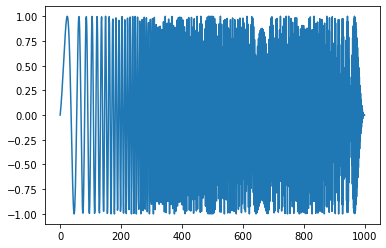

In [31]:
plt.plot(chirp)

In [32]:
spectro_chirp = spectrogram(chirp, Fs,window=100, overlap=10)

Text(0.5, 1.0, 'Espectrograma do chirp 10-1000 Hz')

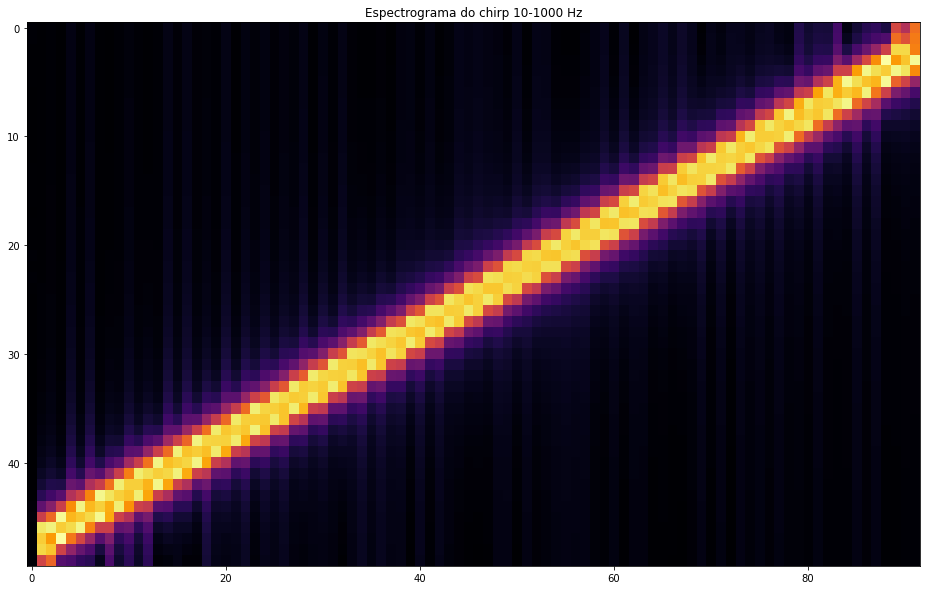

In [33]:
plt.figure(figsize=(16,10))
plt.imshow(spectro_chirp/np.mean(spectro_chirp), aspect='auto', cmap='inferno', vmin=0, vmax=8)
plt.title('Espectrograma do chirp 10-1000 Hz')

**5.** Um sinal FM é um sinal que tem a frequência de uma sinal de frequência portadora modificado por um sinal de mensagem. De maneira carente de precisão, pode-se dizer que um sinal FM é representado por $$s_{fm} = \sin(2\pi f_0t + \beta\sin(2\pi f_m t))$$
onde $f_0$ é a frequencia de portadora, $f_m$ é a frequência do sinal de mensagem e $\beta$ é o índice de modulação (para mais informações ver [aqui](https://www.rfcafe.com/references/electrical/frequency-modulation.htm) ou [aqui](http://paginapessoal.utfpr.edu.br/alessandro/disciplinas-do-semestre/principios-de-comunicacao/aulas/segunda-prova/Modulacao%20Angular.pdf)).

Crie um sinal FM e proceda com a visualização do espectrograma desse sinal. Você deve visualizar uma senoide. Como deve ser a visualização de um sinal AM (explique) ?

In [34]:
f0 = 10e3
fm = 1
N = 100000
T = 5
Ts = T/N
Fs = 1/Ts
t = np.arange(0,T,1/N)
beta = 1e3
sFM = np.sin(2*np.pi*f0*t + beta*np.sin(2*np.pi*fm*t))

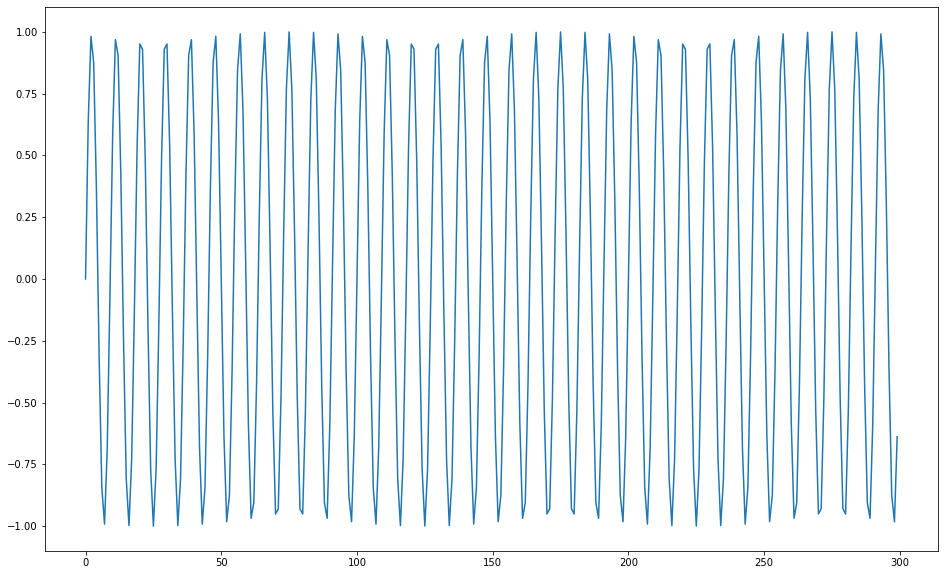

In [35]:
plt.figure(figsize=(16,10))
plt.plot(sFM[:300])

In [36]:
spectro_sFM = spectrogram(sFM, Fs)

Text(0.5, 1.0, 'Espectrograma do sinal FM')

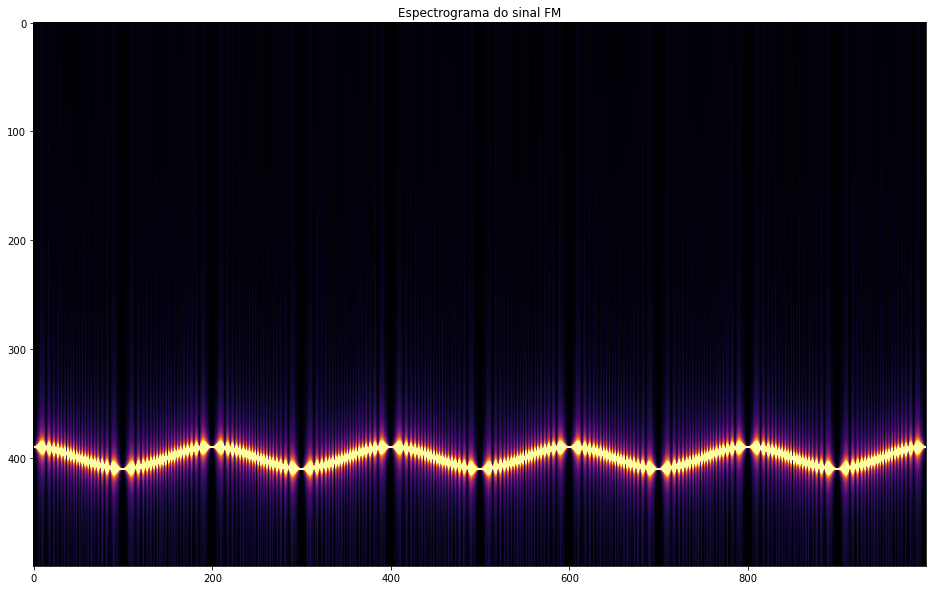

In [37]:
plt.figure(figsize=(16,10))
plt.imshow(spectro_sFM/np.mean(spectro_sFM), aspect='auto', cmap='inferno', vmin=0, vmax=8)
plt.title('Espectrograma do sinal FM')

A frequência seria uma linha centrada na frequencia da portadora, ficando mais clara ou mais escura o longo do tempo. Isso se deve ao fato da frequencia nao variar no caso da transmissão AM.